### Tratamento de variaveis categoricas

base de dados: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

Data de início: 21/04/2021 <br>
Autor: Douglas  <br>

Objetivo: Juntar dados categoricos em uma única coluna para depois trata-los como dummy
<br>

No probelama de classificação que estive trabalhando tive problemas em agregar algumas colunas que traziam o mesmo tipo de informação (atores participantes dos filmes - Star1, Star2, Star3, Star4) e então tratar esses dados para trata-los como dummy;

## Ajuste da base <br>

Inicialment só deixarei a base de dados igual a forma que quero abordar o problemas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas import Series, DataFrame
import re

In [2]:
path = '../Projects/Datasets/imdb_top_1000.csv'

In [3]:
df = pd.read_csv('../Projects/Datasets/imdb_top_1000.csv')

### Ajuste da variavel resposta - <br>
Lets start by knowing our data. First we're going to exam the Genere and think about our response variable.

How we see, there are movies with more than 1 Genere, so, lets create 3 generes columns

In [4]:
df[['Genre_1','Genre_2', 'Genre_3']] = df['Genre'].str.split(',',expand=True)


In [5]:
df['Genre_1'] = df['Genre_1'].str.replace(' ', '')
df['Genre_2'] = df['Genre_2'].str.replace(' ', '')
df['Genre_3'] = df['Genre_3'].str.replace(' ', '')

In [6]:
total = df[['Genre_1', 'Genre_2', 'Genre_3']].isnull().sum()
print('Tamanho da nossa base:', len(df))
total

Tamanho da nossa base: 1000


Genre_1      0
Genre_2    105
Genre_3    354
dtype: int64

Grande parte da nossa base possui mais que 1 genero - (apenas 105 filmes nao possuem 2 generos e 354 nao possuem 3).

In [7]:
df_gen2 = df[df['Genre_2'].notna()]

In [8]:
len(df_gen2)

895

In [9]:
df_gen2 = df[df['Genre_2'].notna()]
df_gen3 = df[df['Genre_3'].notna()]
df_gen2['Genre_all'] = df_gen2['Genre_2']
df_gen3['Genre_all'] = df_gen3['Genre_3']
df['Genre_all'] = df['Genre_1']

C:\Users\dougg\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dougg\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [10]:
df_all_movies = pd.concat([df, df_gen2, df_gen3])

In [11]:
len(df_all_movies)

2541

In [12]:
df_all_movies.groupby('Genre_all').count()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_1,Genre_2,Genre_3
Genre_all,,,,,,,,,,,,,,,,,,,
Action,189,189,189,175,189,189,189,189,156,189,189,189,189,189,189,156,189,189,173
Adventure,196,196,196,189,196,196,196,196,180,196,196,196,196,196,196,170,196,196,182
Animation,82,82,82,80,82,82,82,82,75,82,82,82,82,82,82,67,82,82,81
Biography,109,109,109,107,109,109,109,109,97,109,109,109,109,109,109,96,109,109,97
Comedy,233,233,233,212,233,233,233,233,188,233,233,233,233,233,233,191,233,220,164
Crime,209,209,209,184,209,209,209,209,169,209,209,209,209,209,209,171,209,209,174
Drama,724,724,724,644,724,724,724,724,600,724,724,724,724,724,724,597,724,639,448
Family,56,56,56,53,56,56,56,56,50,56,56,56,56,56,56,48,56,56,50
Fantasy,66,66,66,61,66,66,66,66,58,66,66,66,66,66,66,56,66,66,62


In [13]:
df_all_movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_1,Genre_2,Genre_3,Genre_all
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Drama,None,None,Drama
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Crime,Drama,None,Crime
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Action,Crime,Drama,Action
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Crime,Drama,None,Crime
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",Crime,Drama,None,Crime


### Variable Star -> Dummy

Aqui vamos transofmar as variaveis Star em dummy. <br>
Primeiro vamos analisar as 4 colunas Star <br>
Em seguida iremos remover as estrelas que não aparecem mais do que 8 vezes


In [14]:
df_all_movies['all_stars2'] = df_all_movies[['Star1', 'Star2','Star3','Star4']].agg(','.join, axis=1)

In [234]:
#df_all_movies['all_stars2'] = df_all_movies['all_stars2'].str.replace(' ', '')

In [15]:
df_all_movies['all_stars2'].head()

0    Tim Robbins,Morgan Freeman,Bob Gunton,William ...
1      Marlon Brando,Al Pacino,James Caan,Diane Keaton
2    Christian Bale,Heath Ledger,Aaron Eckhart,Mich...
3    Al Pacino,Robert De Niro,Robert Duvall,Diane K...
4    Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...
Name: all_stars2, dtype: object

In [16]:
df_all_movies['all_stars2'] = df_all_movies.all_stars2.apply(lambda x: x.split(','))

In [17]:
df_all_movies['all_stars2'].head()

0    [Tim Robbins, Morgan Freeman, Bob Gunton, Will...
1    [Marlon Brando, Al Pacino, James Caan, Diane K...
2    [Christian Bale, Heath Ledger, Aaron Eckhart, ...
3    [Al Pacino, Robert De Niro, Robert Duvall, Dia...
4    [Henry Fonda, Lee J. Cobb, Martin Balsam, John...
Name: all_stars2, dtype: object

In [20]:
df_all_star = df_all_movies['all_stars2'].apply(pd.Series)

In [21]:
df_all_star.head()

,0,1,2,3
0,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
1,Marlon Brando,Al Pacino,James Caan,Diane Keaton
2,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine
3,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton
4,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler


In [21]:
### Check for somestar
#n_row = 0
#for word in df_all_star[3]:
#    if word == 'Aamir Bashir':
#        print(n_row, word)
#    n_row += 1

In [22]:
df_all_star_one_collum = pd.concat([df_all_star[0], df_all_star[1],df_all_star[2], df_all_star[3]])

In [23]:
from collections import Counter
#here we use the counter for create a counter (like a dictionary) for count the number of elements 
#in our list

star_coun = Counter(elem for elem in df_all_star_one_collum)

In [57]:
### how to filter values from a count.value()
y = lambda x: x in list(star_coun.values())

SyntaxError: invalid syntax (<ipython-input-57-e6bb49e343d2>, line 1)

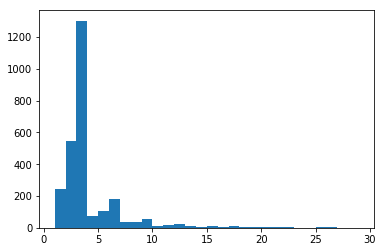

In [27]:
import matplotlib.pyplot as plt

#plt.bar(star_coun.keys(), star_coun.values())
#plt.show

plt.hist(star_coun.values(), bins = range(1,30))
plt.show()

In [28]:
star_coun

Counter({'Tim Robbins': 9,
         'Marlon Brando': 9,
         'Christian Bale': 30,
         'Al Pacino': 33,
         'Henry Fonda': 6,
         'Elijah Wood': 9,
         'John Travolta': 2,
         'Liam Neeson': 10,
         'Leonardo DiCaprio': 27,
         'Brad Pitt': 31,
         'Tom Hanks': 38,
         'Clint Eastwood': 25,
         'Lilly Wachowski': 2,
         'Robert De Niro': 44,
         'Mark Hamill': 9,
         'Jack Nicholson': 14,
         'Lin-Manuel Miranda': 3,
         'Kang-ho Song': 12,
         'Suriya': 1,
         'Matthew McConaughey': 15,
         'Kátia Lund': 2,
         'Daveigh Chase': 3,
         'Roberto Benigni': 6,
         'Morgan Freeman': 17,
         'Jodie Foster': 11,
         'Tatsuya Nakadai': 18,
         'Toshirô Mifune': 19,
         'James Stewart': 26,
         'Joaquin Phoenix': 15,
         'Miles Teller': 5,
         'Éric Toledano': 3,
         'Adrien Brody': 7,
         'Russell Crowe': 20,
         'Edward Norton': 14,
  

In [30]:
len(star_coun)

2709

In [31]:
#now we use a dic comprehension to filter the values. 
list_for_drop = list({x: count for x, count in star_coun.items() if count < 6})

In [32]:
#so we have 2745 'stars' that dont be like a star, they just apeper less than 8 times in a list
# of 1000 movies;
len(list_for_drop)

2274

In [33]:
list_for_drop

['John Travolta',
 'Lilly Wachowski',
 'Lin-Manuel Miranda',
 'Suriya',
 'Kátia Lund',
 'Daveigh Chase',
 'Miles Teller',
 'Éric Toledano',
 'Jean Reno',
 'Rob Minkoff',
 'Philippe Noiret',
 'Tsutomu Tatsumi',
 'Anthony Perkins',
 'Zain Al Rafeea',
 'Pushkar',
 'Peter Ramsey',
 'Adrian Molina',
 'Amole Gupte',
 'Ben Burtt',
 'Yôji Matsuda',
 'Rajesh Khanna',
 'Peter Sellers',
 'Tyrone Power',
 'Dean-Charles Chapman',
 'Anand Gandhi',
 'Mohanlal',
 'Payman Maadi',
 'Lubna Azabal',
 'Aras Bulut Iynemli',
 'Çetin Tekindor',
 'Jim Carrey',
 'Audrey Tautou',
 'Jason Statham',
 'Ellen Burstyn',
 'Mohammad Amir Naji',
 'Matthew Modine',
 'Aleksey Kravchenko',
 'Jürgen Prochnow',
 'Malcolm McDowell',
 'Keir Dullea',
 'Lamberto Maggiorani',
 'Peter Lorre',
 'Brigitte Helm',
 'Yash',
 'Prabhas',
 'Carlos Martínez López',
 'Ajay Devgn',
 'Kangana Ranaut',
 'Lembit Ulfsak',
 'Farhan Akhtar',
 'Rajat Barmecha',
 'Bob Peterson',
 'Ivana Baquero',
 'Hugo Weaving',
 'Chieko Baishô',
 'Jason Flemyng',


We have a lot of 'Stars' with just one movie, so, lets removed this stars

In [34]:
#just check if RobertDeNiro is not in our list of drop
# our df_all_star_one_collum is a pandas.Series, so we need use the value_counts()
print('count of John Travolta in our df_all_star_one_collum: ', df_all_star_one_collum[df_all_star_one_collum == 'John Travolta'].value_counts())
print('count of John Travolta in our list of drop:', list_for_drop.count('John Travolta'))
print('')
print('count of RobertDeNiro in our df_all_star_one_collum: ', df_all_star_one_collum[df_all_star_one_collum == 'Aamir Bashir'].value_counts())
print('count of RobertDeNiro in our list of drop:', list_for_drop.count('Aamir Bashir'))

count of John Travolta in our df_all_star_one_collum:  John Travolta    2
dtype: int64
count of John Travolta in our list of drop: 1

count of RobertDeNiro in our df_all_star_one_collum:  Aamir Bashir    3
dtype: int64
count of RobertDeNiro in our list of drop: 1


Great God! Robert De Niro is not in out list of Stars to remove, but Jhon Travolta yes. So, Jhon Travolta have seen better days...

In [37]:
# map aplly a function over a iternerable (like a list), so we are apply the function str over the list of stars
#join - Join all items in a tuple into a string, using a hash character as separator:

df_all_movies['all_stars2_string'] = [', '.join(map(str, l)) for l in df_all_movies['all_stars2']]


#Exemple join
myTuple = ("John", "Peter", "Vicky")

x = "#".join(myTuple)

print(x)

In [38]:
df_all_movies['all_stars2_string'].head()

0    Tim Robbins, Morgan Freeman, Bob Gunton, Willi...
1    Marlon Brando, Al Pacino, James Caan, Diane Ke...
2    Christian Bale, Heath Ledger, Aaron Eckhart, M...
3    Al Pacino, Robert De Niro, Robert Duvall, Dian...
4    Henry Fonda, Lee J. Cobb, Martin Balsam, John ...
Name: all_stars2_string, dtype: object

In [39]:
df_all_movies2 = df_all_movies.copy()

In [40]:
for WORD in list_for_drop:
    df_all_movies2['Star1'] = df_all_movies2['Star1'].str.strip().replace(WORD, '')    
    df_all_movies2['Star2'] = df_all_movies2['Star2'].str.strip().replace(WORD, '')  
    df_all_movies2['Star3'] = df_all_movies2['Star3'].str.strip().replace(WORD, '')  
    df_all_movies2['Star4'] = df_all_movies2['Star4'].str.strip().replace(WORD, '')  

In [41]:
df_all_movies2[df_all_movies2['Star4'] == 'Aamir Bashir']

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Star3,Star4,No_of_Votes,Gross,Genre_1,Genre_2,Genre_3,Genre_all,all_stars2,all_stars2_string


In [37]:
with pd.option_context('display.max_columns',None ):
    display(df_all_movies[df_all_movies2['Star4'] == 'Aamir Bashir'])

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_1,Genre_2,Genre_3,Genre_all,all_stars2,all_stars2_string


In [153]:
#df_all_movies2['Star1']

In [42]:
df_all_movies2['all_stars_99'] = df_all_movies2[['Star1', 'Star2','Star3','Star4']].agg(','.join, axis=1)

In [43]:
df_all_movies2['all_stars_99'] = df_all_movies2['all_stars_99'].str.replace(',,,', ',')
df_all_movies2['all_stars_99'] = df_all_movies2['all_stars_99'].str.replace(',,', ',')

In [44]:
df_all_movies2['all_stars_999'] = df_all_movies2.all_stars_99.apply(lambda x: x.split(','))

In [45]:
df_all_movies2['all_stars_999']

0                        [Tim Robbins, Morgan Freeman, ]
1      [Marlon Brando, Al Pacino, James Caan, Diane K...
2                        [Christian Bale, Michael Caine]
3      [Al Pacino, Robert De Niro, Robert Duvall, Dia...
4            [Henry Fonda, Lee J. Cobb, Martin Balsam, ]
5      [Elijah Wood, Viggo Mortensen, Ian McKellen, O...
6       [, Uma Thurman, Samuel L. Jackson, Bruce Willis]
7           [Liam Neeson, Ralph Fiennes, Ben Kingsley, ]
8      [Leonardo DiCaprio, Joseph Gordon-Levitt, Ken ...
9                           [Brad Pitt, Edward Norton, ]
10          [Elijah Wood, Ian McKellen, Orlando Bloom, ]
11                           [Tom Hanks, Robin Wright, ]
12                                    [Clint Eastwood, ]
13     [Elijah Wood, Ian McKellen, Viggo Mortensen, O...
14                                                  [, ]
15                         [Robert De Niro, Joe Pesci, ]
16     [Mark Hamill, Harrison Ford, Carrie Fisher, Bi...
17                             

In [42]:
###check

n_row = 0
for row in df_all_movies2['all_stars_999']:
    for word in row:
        if word == 'Aamir Bashir':
            print(n_row, word)
    n_row += 1

In [43]:
df_all_movies2['all_stars_999'][224]

224    [Anupam Kher, ]
224    [Anupam Kher, ]
224    [Anupam Kher, ]
Name: all_stars_999, dtype: object

In [230]:
n_row = 0
for row in list_for_drop:
    for word in row:
        if word == 'Aamir Bashir':
            print(n_row, word)
    n_row += 1

In [234]:
list_for_drop == 'Aamir Bashir'

False

### Dummie stage

In [58]:
dummie_test = pd.get_dummies(df_all_movies2['all_stars_999'].apply(pd.Series).stack()).sum(level=0)

In [59]:
dummie_test

,,Aamir Khan,Adil Hussain,Adrien Brody,Akshay Kumar,Al Pacino,Alan Arkin,Alan Tudyk,Albert Brooks,Albert Finney,...,Winona Ryder,Won Bin,Woody Allen,Woody Harrelson,Yoko Honna,Yun-Fat Chow,Zachary Quinto,Zbigniew Zamachowski,Ziyi Zhang,Zoe Saldana
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.preprocessing import MultiLabelBinarizer

In [61]:
mlb = MultiLabelBinarizer()

In [62]:
s = df_all_movies2['all_stars_999']

In [63]:
len(s)

2541

In [64]:
dummie_test = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_)

In [65]:
dummie_test

,,Aamir Khan,Adil Hussain,Adrien Brody,Akshay Kumar,Al Pacino,Alan Arkin,Alan Tudyk,Albert Brooks,Albert Finney,...,Winona Ryder,Won Bin,Woody Allen,Woody Harrelson,Yoko Honna,Yun-Fat Chow,Zachary Quinto,Zbigniew Zamachowski,Ziyi Zhang,Zoe Saldana
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
len(dummie_test)

2541

In [67]:
len(df_all_movies2['all_stars_999'])

2541

In [68]:
df_all_movies3 = df_all_movies2.merge(dummie_test, left_index=True, right_index=True)

In [69]:
with pd.option_context('display.max_columns',None):
    display(df_all_movies3.head(10))

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Genre_1,Genre_2,Genre_3,Genre_all,all_stars2,all_stars2_string,all_stars_99,all_stars_999,,Aamir Khan,Adil Hussain,Adrien Brody,Akshay Kumar,Al Pacino,Alan Arkin,Alan Tudyk,Albert Brooks,Albert Finney,Alec Guinness,Alexandra Maria Lara,Alia Bhatt,Amitabh Bachchan,Amy Adams,Amy Poehler,Amy Ryan,Ana de Armas,André Ramiro,Anna Kendrick,Anne Hathaway,Anthony Edwards,Anthony Hopkins,Anthony Quinn,Anupam Kher,Aoi Yûki,Armin Mueller-Stahl,Arnold Schwarzenegger,Arshad Warsi,Audrey Hepburn,Ayushmann Khurrana,Ben Affleck,Ben Foster,Ben Kingsley,Benedict Cumberbatch,Benicio Del Toro,Bill Murray,Bill Nighy,Bill Paxton,Billy Crudup,Billy Crystal,Billy Dee Williams,Boman Irani,Boris Karloff,Brad Pitt,Bradley Cooper,Brenda Blethyn,Brendan Gleeson,Brie Larson,Bruce Willis,Bruno Ganz,Bruno Kirby,Bryan Cranston,Burt Lancaster,Buster Keaton,Cameron Diaz,Carrie Fisher,Cary Elwes,Cary Grant,Cate Blanchett,Catherine Deneuve,Catherine Keener,Charles Bronson,Charles Chaplin,Charles Laughton,Charles Vanel,Charlize Theron,Charlton Heston,Chazz Palminteri,Chico Marx,Chiwetel Ejiofor,Chloë Grace Moretz,Choi Min-sik,Chris Cooper,Chris Evans,Chris Hemsworth,Chris Pine,Chris Pratt,Chris Sarandon,Chris Williams,Christian Bale,Christian Slater,Christopher Eccleston,Christopher Lloyd,Christopher Plummer,Christopher Walken,Claude Rains,Clint Eastwood,Clive Owen,Colin Clive,Colin Farrell,Colin Firth,Craig T. Nelson,Crispin Glover,Dakota Fanning,Dan Aykroyd,Dana Andrews,Daniel Brühl,Daniel Craig,Daniel Day-Lewis,Daniel Radcliffe,Danny Aiello,Danny Glover,Daryl Hannah,Darío Grandinetti,Dave Bautista,David Carradine,David Morse,Deborah Kara Unger,Dennis Hopper,Denzel Washington,Diane Keaton,Diane Kruger,Dianne Wiest,Domhnall Gleeson,Don Cheadle,Don Rickles,Donald Sutherland,Donna Reed,Donnie Yen,Dustin Hoffman,Ed Harris,Eddie Murphy,Eddie Redmayne,Edmond O'Brien,Edward G. Robinson,Edward Norton,Elijah Wood,Elsa Lanchester,Emily Blunt,Emma Stone,Emma Watson,Erdem Can,Eric Bana,Ernest Borgnine,Ethan Coen,Ethan Hawke,Ewan McGregor,F. Murray Abraham,Farley Granger,Faye Dunaway,Felicity Jones,Fionnula Flanagan,Frances McDormand,Franka Potente,Fred MacMurray,Frederic Forrest,Fredric March,Gabriel Byrne,Gael García Bernal,Gary Oldman,Gena Rowlands,Gene Hackman,Gene Kelly,Gene Lockhart,Gene Wilder,Geoffrey Rush,George C. Scott,George Clooney,George Cukor,Gerard Butler,Ginnifer Goodwin,Gong Li,Grace Kelly,Gracy Singh,Graham Greene,Gregory Peck,Groucho Marx,Guillaume Canet,Gunnar Björnstrand,Guy Pearce,Harpo Marx,Harrison Ford,Harvey Keitel,Helen Hunt,Henry Bergman,Henry Fonda,Holly Hunter,Hugh Jackman,Humphrey Bogart,Ian McKellen,Ingrid Bergman,Irrfan Khan,Irène Jacob,J.K. Simmons,Jack Hawkins,Jack Lemmon,Jack Nicholson,Jack Warden,Jake Gyllenhaal,James Caan,James Coburn,James Marsden,James McAvoy,James Stewart,Jamie Foxx,Janet Leigh,Jared Leto,Jason Schwartzman,Javier Bardem,Jay Baruchel,Jean-Louis Trintignant,Jeff Bridges,Jennifer Connelly,Jennifer Lawrence,Jeremy Irons,Jeremy Renner,Jeremy Strong,Jessica Chastain,Jessica Lange,Jet Li,Jimmy Sheirgill,Jinpachi Nezu,Joan Allen,Joaquin Phoenix,Jodie Foster,Joe Pesci,Joe Russo,John Castle,John Cazale,John Goodman,John Hurt,John Malkovich,John Musker,John Turturro,John Wayne,Johnny Depp,Jon Bernthal,Jon Voight,Jonah Hill,Joseph Calleia,Joseph Cotten,Joseph Gordon-Levitt,Josh Brolin,Josh Hartnett,Jude Law,Judi Dench,Julian Dennison,Julianne Moore,Julie Andrews,Julie Christie,Julie Delpy,Jung-woo Ha,Justin Theroux,Kang-ho Song,Kareena Kapoor,Karl Malden,Kate Winslet,Katharine Hepburn,Katharine Ross,Kathy Bates,Keira Knightley,Ken Watanabe,Kerry Washington,Kevin Bacon,Kevin Costner,Kevin Spacey,Kirk Douglas,Kurt Russell,Kôichi Yamadera,Laura Dern,Lauren Bacall,Laurence Olivier,Lea Thompson,Lee Byung-Hun,Lee J. Cobb,Lee Unkrich,Leonard Nimoy,Leonardo DiCaprio,Liam Neeson,Liev Schreibe

In [70]:
df_all_movies3.groupby('Genre_all').sum()

,IMDB_Rating,Meta_score,No_of_Votes,,Aamir Khan,Adil Hussain,Adrien Brody,Akshay Kumar,Al Pacino,Alan Arkin,...,Winona Ryder,Won Bin,Woody Allen,Woody Harrelson,Yoko Honna,Yun-Fat Chow,Zachary Quinto,Zbigniew Zamachowski,Ziyi Zhang,Zoe Saldana
Genre_all,,,,,,,,,,,,,,,,,,,,,
Action,1502.3,11508.0,76388586,135,2,0,0,2,0,0,...,0,2,0,0,0,3,2,0,2,4
Adventure,1558.6,14041.0,83290779,138,1,1,1,0,0,0,...,0,0,0,1,0,1,2,0,2,4
Animation,650.3,6082.0,21978630,75,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
Biography,865.0,7403.0,27456942,83,1,0,1,0,5,1,...,0,0,0,0,0,0,0,0,0,0
Comedy,1841.5,14656.0,52533570,206,5,1,1,2,0,0,...,1,0,5,2,0,0,0,1,0,2
Crime,1662.5,12745.0,58796324,168,1,0,1,3,11,1,...,0,2,0,1,0,2,0,0,0,0
Drama,5762.6,46824.0,174288286,618,7,2,2,3,13,2,...,3,3,2,2,2,1,0,2,0,0
Family,443.1,3894.0,12514438,50,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Fantasy,523.5,4428.0,22908406,55,0,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,1


In [71]:
### TODO create a groupby with decending values of star, to know with star apper most frequentily for genere type